In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("data/my_ts.xlsx")

In [3]:
df.set_index("date", inplace=True)

In [4]:
from arml import unit_root_test, plot_PACF_ACF, cat_forecaster, lightGBM_forecaster, xgboost_forecaster

In [5]:
unit_root_test(df["electricity"], method="ADF")

ADF p-value: 0.009384 and data is stationary at 5% significance level


(0.009383682866887066, None)

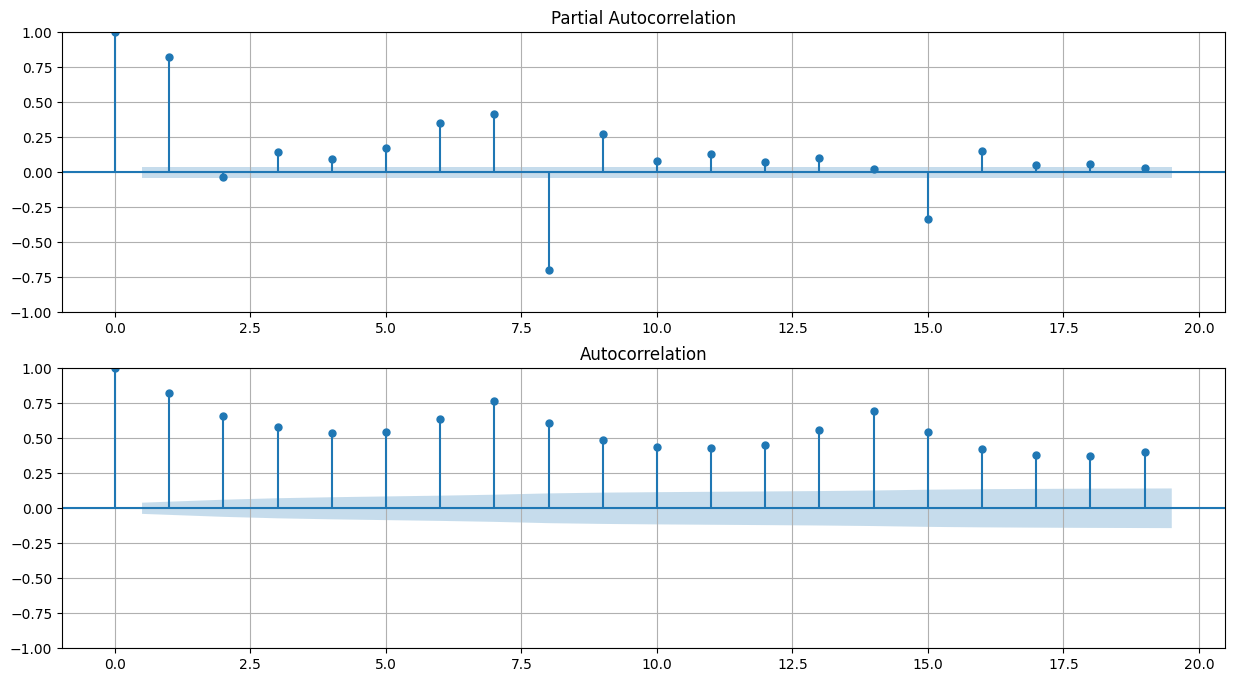

In [6]:
plot_PACF_ACF(df["electricity"], lag_num=19)

In [7]:
train_d, test_x, test_y = df[:-60], df[-60:].iloc[:,1:], df[-60:]["electricity"]

In [8]:
cat_dict = {"month": ['January','February', 'March','April','May','June', 'July', 'August', 'September', 'October', 'November', 'December'],
 "week_day": ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

In [9]:
my_xgb = xgboost_forecaster(n_lag=21, target_col="electricity", cat_dict=cat_dict)

In [10]:
model = my_xgb.fit(train_d)

In [11]:
my_preds = my_xgb.forecast(model, n_ahead=len(test_x), x_test=test_x)

In [12]:
((np.array(test_y)-my_preds)/test_y).mean()*100

7.036911875440264

In [13]:
my_preds.shape

(60,)

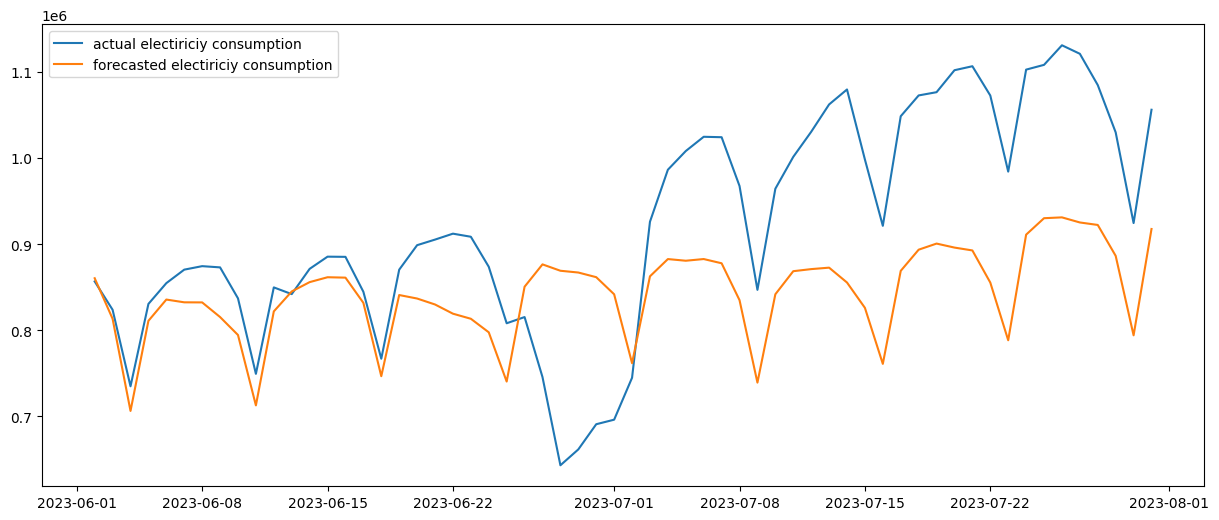

In [14]:
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(test_y.index,test_y, label = "actual electiriciy consumption", color = "C0")
ax.plot(test_y.index, my_preds, label = "forecasted electiriciy consumption", color = "C1")
plt.legend(loc="upper left")
plt.show()